In [561]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [562]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


## Загружаем данные

In [563]:
df_bp = pd.read_excel("c:\df\X_bp.xlsx",index_col=0)
df_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [564]:
#df_bp.drop(df_bp.index[0:23],inplace=True)
#df_bp=df_bp.reset_index(drop=True)

In [565]:
df_nup = pd.read_excel("c:\df\X_nup.xlsx",index_col=0)
df_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


In [566]:
#df_nup.drop(df_nup.index[0:40],inplace=True)
#df_nup=df_nup.reset_index(drop=True)

## Объединим данные в общий датасет

In [567]:
#df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')
#df
df = df_nup.join(df_bp,  how='inner')

## Предобработка и Разведочный анализ данных

In [568]:
#посмотрим, какая информация содержится в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

In [569]:
#посмотрим уникальность значений в колонках, выведем на экран последние 10 значений
for column in df.columns:
    print(f'Колонка {column}')
    print(sorted(df[column].unique())[-10:])

Колонка Угол нашивки, град
[0.0, 90.0]
Колонка Шаг нашивки
[13.3748547768973, 13.378772113231, 13.4849451024425, 13.5719207023593, 13.6539870540166, 13.732404403383, 14.0332153037961, 14.0513828180002, 14.3764512763632, 14.4405218753969]
Колонка Плотность нашивки
[85.6609961909375, 85.9871737934485, 86.0124270098611, 88.0724895050505, 88.8076471500205, 89.8766155103646, 92.0421393826707, 92.9634919477473, 98.2026027528147, 103.988901301494]
Колонка Соотношение матрица-наполнитель
[5.11078055270228, 5.12036847803355, 5.21044243868871, 5.25889457769596, 5.29584199270212, 5.3141436851035, 5.42513947440363, 5.45295943131032, 5.45556617827335, 5.59174159869754]
Колонка Плотность, кг/м3
[2160.0, 2160.75143947764, 2161.56521646388, 2170.34236302043, 2172.24679646503, 2182.75182183283, 2184.49319952038, 2192.29763744164, 2192.73878348, 2207.77348061119]
Колонка модуль упругости, ГПа
[1542.1684576617, 1543.02368299018, 1546.29088574472, 1572.09604227992, 1588.67721742116, 1615.09697286127, 1628

In [570]:
#проверим данные на пропуски
df.isna().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

#### Пропусков нет

#### Основные статистические характеристики, в том числе средние и медианные значениия характеристик

In [571]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.899222,57.153929,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.563467,12.350969,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [572]:
df.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

#### Гистограммы

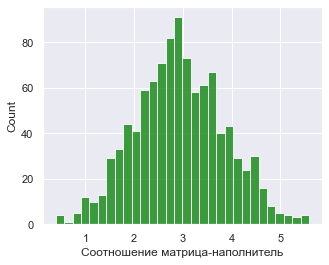

In [573]:
sns.histplot(df['Соотношение матрица-наполнитель'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

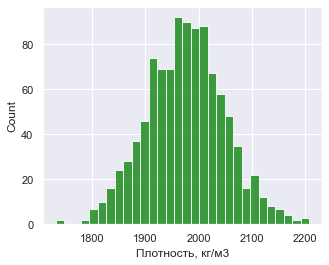

In [574]:
sns.histplot(df['Плотность, кг/м3'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

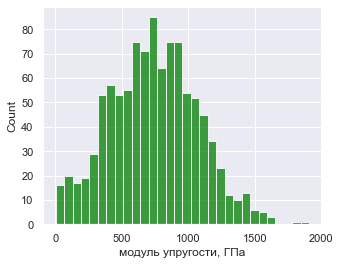

In [575]:
sns.histplot(df['модуль упругости, ГПа'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

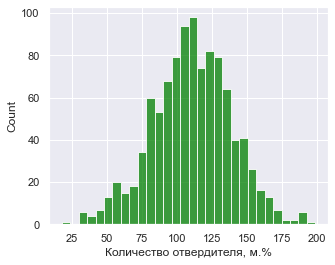

In [576]:
sns.histplot(df['Количество отвердителя, м.%'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

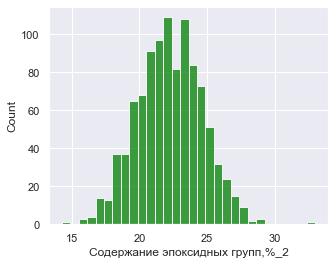

In [577]:
sns.histplot(df['Содержание эпоксидных групп,%_2'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

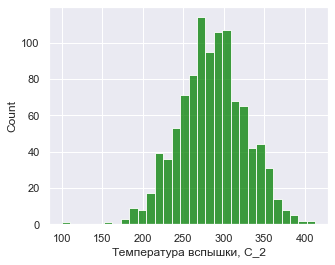

In [578]:
sns.histplot(df['Температура вспышки, С_2'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

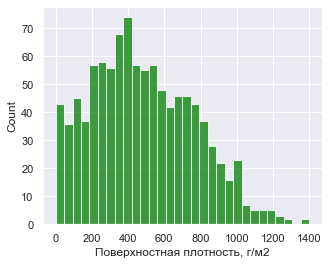

In [579]:
sns.histplot(df['Поверхностная плотность, г/м2'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

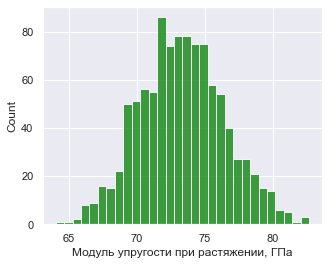

In [580]:
sns.histplot(df['Модуль упругости при растяжении, ГПа'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

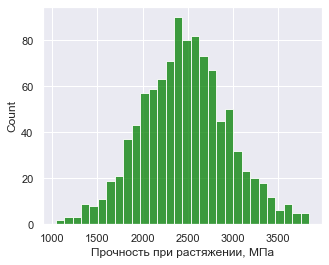

In [581]:
sns.histplot(df['Прочность при растяжении, МПа'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

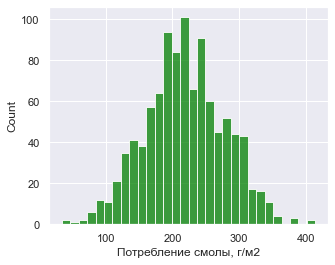

In [582]:
sns.histplot(df['Потребление смолы, г/м2'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

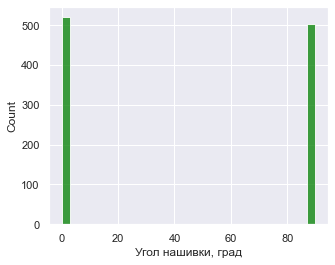

In [583]:
sns.histplot(df['Угол нашивки, град'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

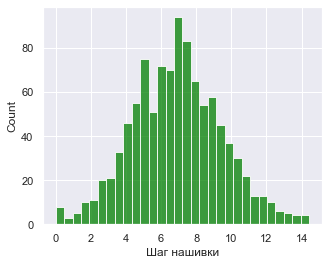

In [584]:
sns.histplot(df['Шаг нашивки'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

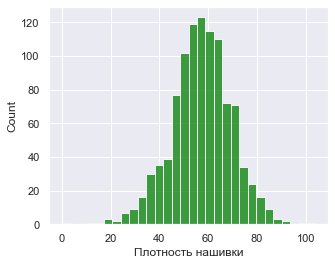

In [585]:
sns.histplot(df['Плотность нашивки'], kde=False, bins=30, color='green')
sns.set(rc={'figure.figsize':(5,4)})

#### Для большинства характеристик распределение близко к нормальному
     Исключение составляют:
     - Поверхностная плотность, г/м2 - нормальное распределение со смещением вправо. Что свидетельствует о большем количестве измерений с меньшим показателем поверхностной алотности
     - Угол нашивки, град - дискретное распределение, так как колонка содержит всего два уникальных значения

#### Диаграммы ящика с усами

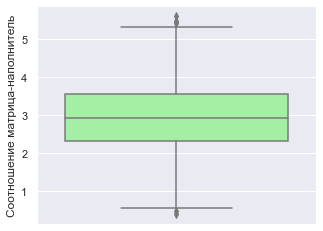

In [586]:
sns.boxplot(y='Соотношение матрица-наполнитель', data=df, color='palegreen');

<AxesSubplot:ylabel='Плотность, кг/м3'>

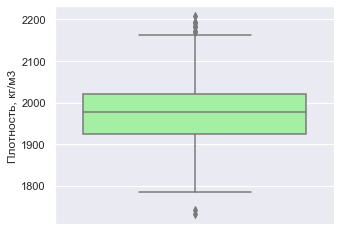

In [587]:
sns.boxplot(y='Плотность, кг/м3', data=df, color='palegreen')

<AxesSubplot:ylabel='модуль упругости, ГПа'>

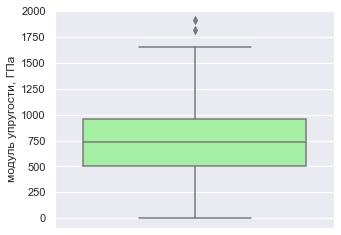

In [588]:
sns.boxplot(y='модуль упругости, ГПа', data=df, color='palegreen')

<AxesSubplot:ylabel='Количество отвердителя, м.%'>

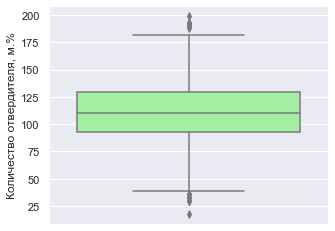

In [589]:
sns.boxplot(y='Количество отвердителя, м.%', data=df, color='palegreen')

<AxesSubplot:ylabel='Содержание эпоксидных групп,%_2'>

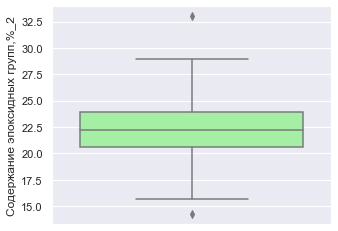

In [590]:
sns.boxplot(y='Содержание эпоксидных групп,%_2', data=df, color='palegreen')

<AxesSubplot:ylabel='Температура вспышки, С_2'>

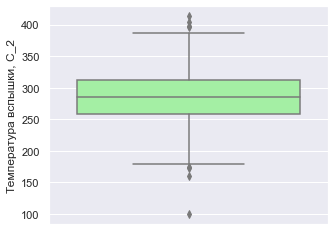

In [591]:
sns.boxplot(y='Температура вспышки, С_2', data=df, color='palegreen')

<AxesSubplot:ylabel='Поверхностная плотность, г/м2'>

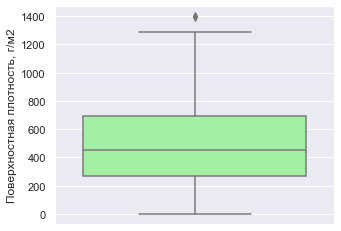

In [592]:
sns.boxplot(y='Поверхностная плотность, г/м2', data=df, color='palegreen')

##### Так же наблюдаем смещение в сторону болеее малых значений характеристики

<AxesSubplot:ylabel='Модуль упругости при растяжении, ГПа'>

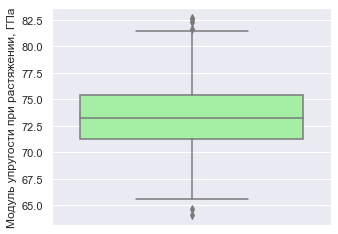

In [593]:
sns.boxplot(y='Модуль упругости при растяжении, ГПа', data=df, color='palegreen')

<AxesSubplot:ylabel='Прочность при растяжении, МПа'>

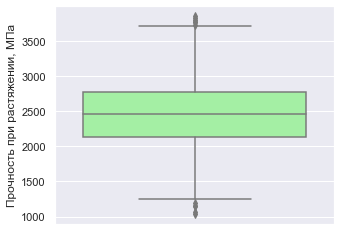

In [594]:
sns.boxplot(y='Прочность при растяжении, МПа', data=df, color='palegreen')

<AxesSubplot:ylabel='Потребление смолы, г/м2'>

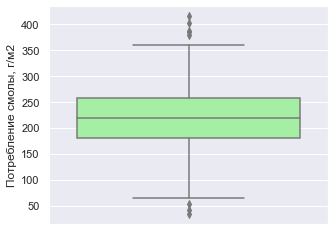

In [595]:
sns.boxplot(y='Потребление смолы, г/м2', data=df, color='palegreen')

<AxesSubplot:ylabel='Угол нашивки, град'>

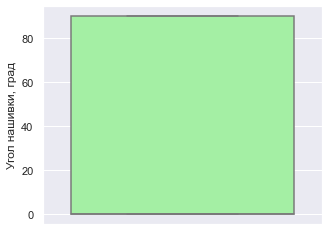

In [596]:
sns.boxplot(y='Угол нашивки, град', data=df, color='palegreen')

##### Дискретная величина, график не показателен

<AxesSubplot:ylabel='Шаг нашивки'>

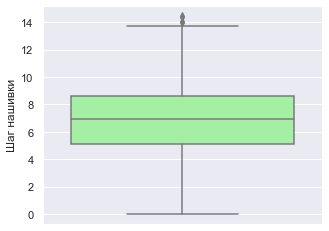

In [597]:
sns.boxplot(y='Шаг нашивки', data=df, color='palegreen')

<AxesSubplot:ylabel='Плотность нашивки'>

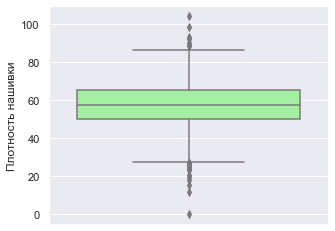

In [598]:
sns.boxplot(y='Плотность нашивки', data=df, color='palegreen')

#### По диаграммам Ящик с усами наблюдаем наличие выбросов по всем характеристикам, кроме Угла нашивки, для которого эта диаграмма неинформативна

#### Построим попарные графики рассеяния точек

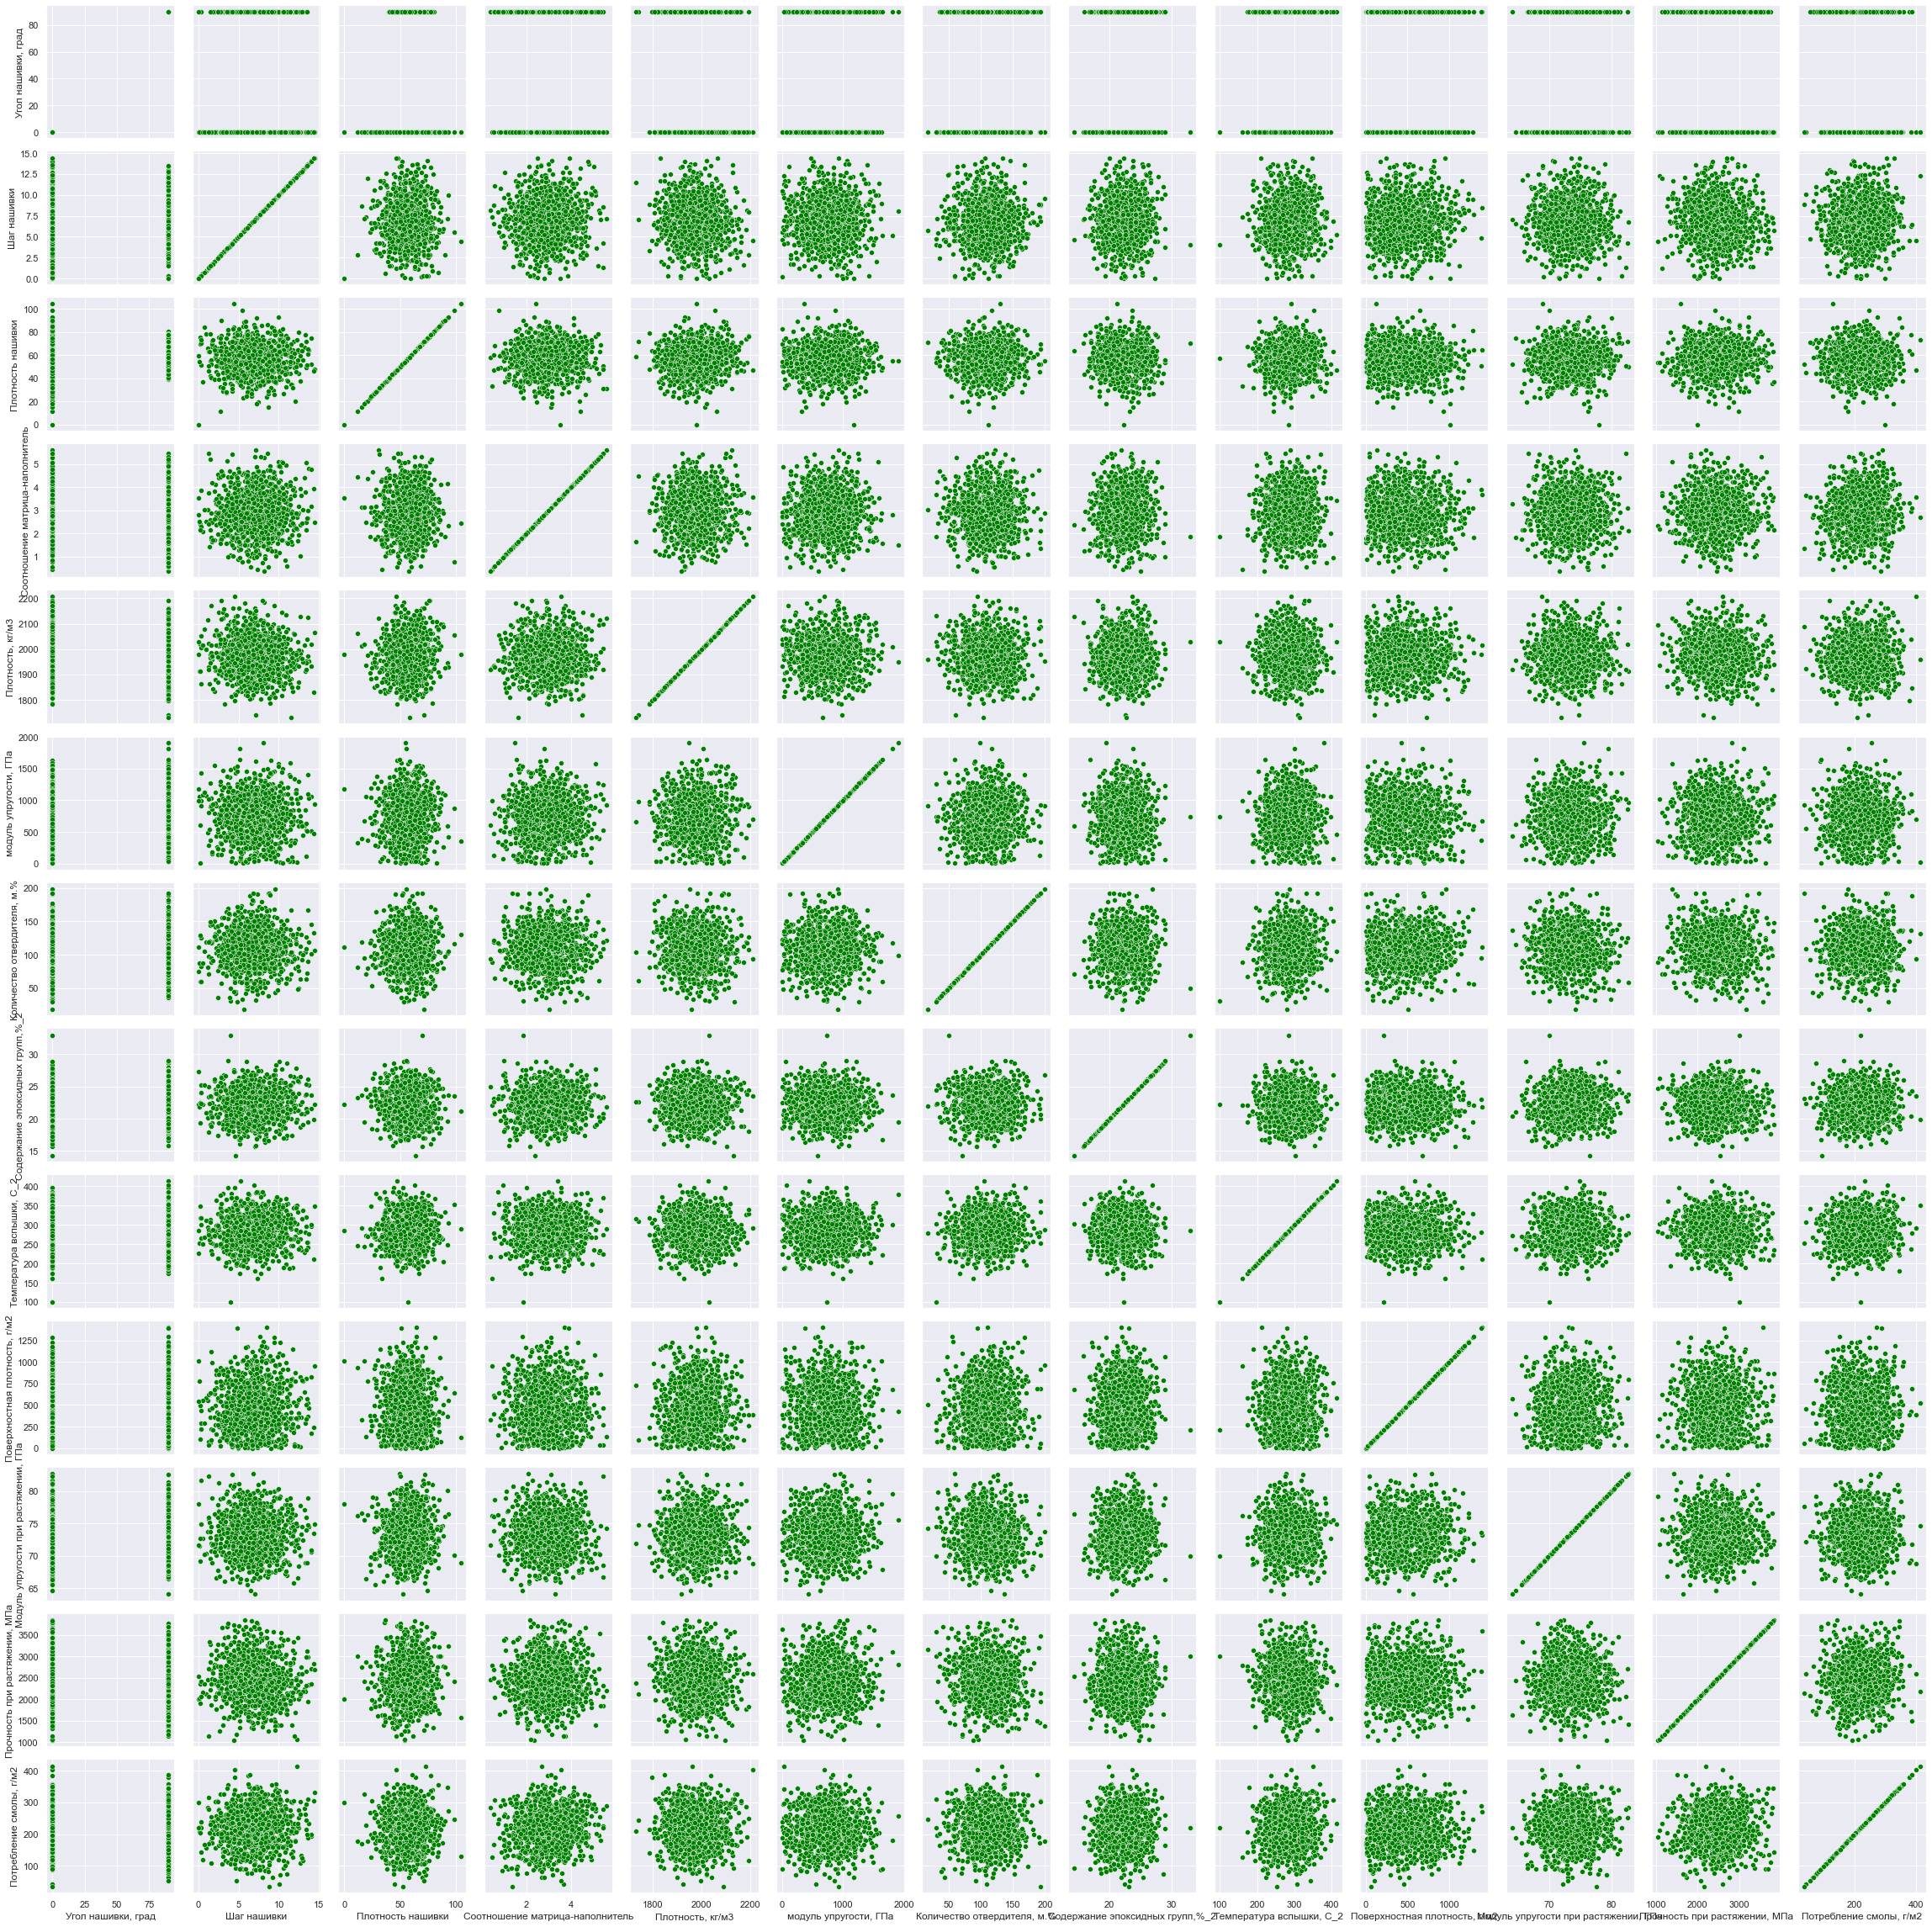

In [599]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='green')

#### Попарные графики рассеяния показывают очень слабую зависимость между переменными датасета

### Исследуем датасет, применив коэффициент корреляции

In [600]:
df.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.023616,0.107947,-0.031073,-0.068474,-0.025417,0.038570,0.008052,0.020695,0.052299,0.023003,0.023398,-0.015334
Шаг нашивки,0.023616,1.000000,0.003487,0.036437,-0.061015,-0.009875,0.014887,0.003022,0.025795,0.038332,-0.029468,-0.059547,0.013394
Плотность нашивки,0.107947,0.003487,1.000000,-0.004652,0.080304,0.056346,0.017248,-0.039073,0.011391,-0.049923,0.006476,0.019604,0.012239
Соотношение матрица-наполнитель,-0.031073,0.036437,-0.004652,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531
"Плотность, кг/м3",-0.068474,-0.061015,0.080304,0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937
"модуль упругости, ГПа",-0.025417,-0.009875,0.056346,0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840
"Количество отвердителя, м.%",0.038570,0.014887,0.017248,-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446
"Содержание эпоксидных групп,%_2",0.008052,0.003022,-0.039073,0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165
"Температура вспышки, С_2",0.020695,0.025795,0.011391,-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954
"Поверхностная плотность, г/м2",0.052299,0.038332,-0.049923,-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692


#### Построим тепловую карту коэффициентов корреляции

<AxesSubplot:>

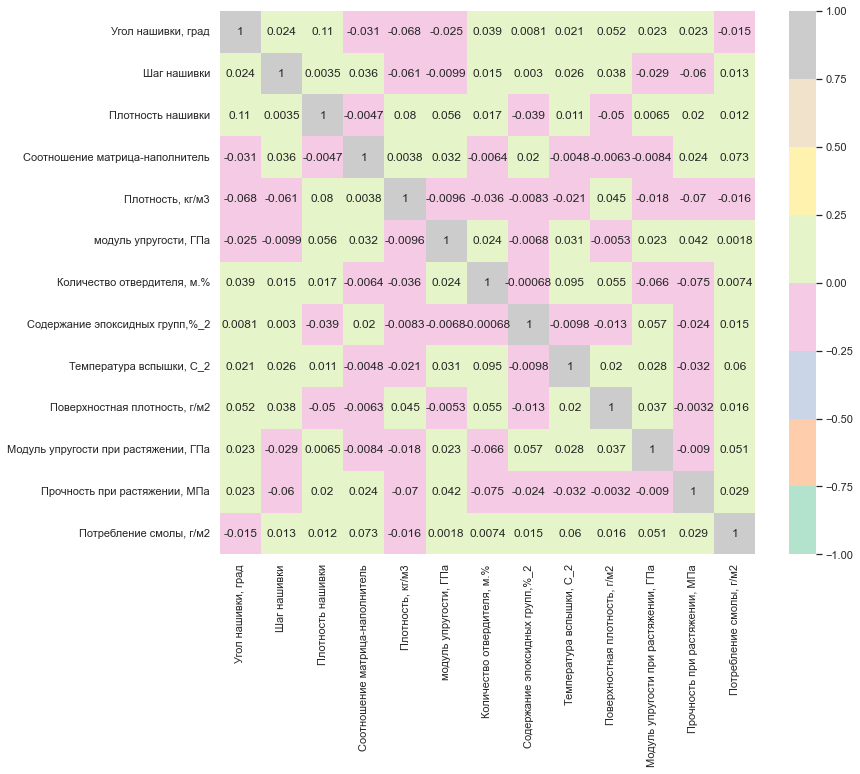

In [601]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Pastel2')

#### Тепловая карта хорошо демонстрирует наличие слабых прямых и обратных связей переменных в датасете. Все полученные коэффициенты корреляции находятся в помежутке значений от - 0,25 до 0,25. Одним из выводов может быть следующим. Представленный детасет был предобработан заказчиком и оставшиеся переменные являются независимыми и каждая из них несет свою функцию при влиянии на композитный материал. 
     Подробный анализ коэффициентов корреляции показал, что если посмотреть на абсолютные величины коэффициентов корреляции, то максимальные из них будут связаны 5 раз с характеристикой Количество отвердителя и 3 раза с показателем Плотность нашивки. 

#### Проведем предобработку данных и удалим выбросы

In [602]:
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan

In [603]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
dtype: int64

#### Количество выбросов говорит о их незначительности, поэтому их можно удалить из датасета

In [604]:
df_used = df.dropna(axis = 0)

#### Новые основные статистические характеристика датасета

In [605]:
df_used.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,46.057692,6.915585,57.451895,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374
std,45.011619,2.509672,11.239331,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255
min,0.000000,0.037639,27.272928,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698
25%,0.000000,5.134988,50.209656,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091
50%,90.000000,6.943337,57.584225,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715
75%,90.000000,8.591450,64.798211,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777
max,90.000000,13.732404,86.012427,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220


#### Наблюдаем уменьшение количества строк датасета. Датасет очищен от выбросов

#### Попробуем выделить наиболее весомые признаки датасета при помощи факторного анализа

#### Для этого сначала стандартизируем наш датасет

In [606]:
import math
from sklearn import preprocessing

# Функция для стандартизации
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df_used)
    scaled = pd.DataFrame(scaled, columns=df_used.columns)
    return scaled

In [607]:
df_scaled = preprocessing.scale(df_used)
df_scaled

array([[-1.024, -1.162,  0.227, ..., -1.089,  1.149,  0.041],
       [-1.024, -0.764, -0.93 , ..., -1.089,  1.149,  0.041],
       [-1.024, -0.764, -0.04 , ..., -1.089,  1.149,  0.041],
       ...,
       [ 0.977, -1.098,  0.906, ...,  0.471,  0.422,  0.329],
       [ 0.977, -0.24 ,  0.072, ...,  0.243, -0.854, -0.354],
       [ 0.977, -0.334,  1.779, ...,  0.331,  0.839, -0.396]])

#### Датасет стандартизован. Обратимся к методам функционального анализа главных компонент для поиска скрытых факторов влияющих на свойства композита

In [608]:
from sklearn.decomposition import PCA

####  Определим вклад влияния 90% факторов 

In [609]:
pca = PCA(n_components=.9)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.09  0.088 0.087 0.084 0.084 0.08  0.078 0.076 0.075 0.07  0.067 0.063]


####  Можно сделать вывод, что влияние очень слабое. Проведем анализ с целью определения весов характеристик датасета для первых пяти факторов влияния последовательно добавляя по одному фактору

In [610]:
print (pca.components_)

[[-0.203 -0.168 -0.435 -0.426  0.102 -0.444 -0.12  -0.045 -0.279  0.043
  -0.211 -0.222 -0.402]
 [-0.178 -0.308  0.227  0.088  0.121  0.081 -0.507 -0.065 -0.399 -0.439
  -0.02   0.424 -0.014]
 [-0.034  0.024  0.458  0.088  0.651  0.186  0.05  -0.223 -0.108  0.203
  -0.211 -0.362 -0.204]
 [-0.628 -0.035 -0.252  0.271 -0.054  0.17   0.221 -0.267  0.231 -0.18
  -0.46   0.009  0.137]
 [ 0.351 -0.113  0.239 -0.295 -0.335  0.162  0.316 -0.339  0.065 -0.197
  -0.334  0.217 -0.407]
 [ 0.094  0.706  0.048  0.325 -0.248 -0.14  -0.197  0.069 -0.296 -0.165
  -0.312 -0.137 -0.169]
 [-0.012  0.312 -0.017 -0.238  0.004 -0.095 -0.45  -0.685  0.28   0.179
   0.128  0.114  0.159]
 [ 0.228 -0.193 -0.102  0.373  0.022 -0.267  0.071 -0.128 -0.223  0.576
  -0.309  0.42   0.121]
 [ 0.219 -0.146  0.242 -0.004  0.112 -0.617  0.083 -0.043  0.187 -0.396
  -0.223 -0.196  0.437]
 [ 0.032  0.141 -0.002 -0.121  0.3   -0.025 -0.254  0.457  0.553  0.032
  -0.347  0.359 -0.211]
 [ 0.136  0.169 -0.145 -0.488  0.112  0.3

In [611]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.09  0.088 0.087 0.084 0.084 0.08  0.078 0.076 0.075 0.07  0.067 0.063]


In [612]:
pca.singular_values_

array([33.123, 32.807, 32.558, 32.047, 31.901, 31.109, 30.779, 30.404,
       30.209, 29.233, 28.485, 27.627])

In [613]:
pca.explained_variance_ratio_

array([0.09 , 0.088, 0.087, 0.084, 0.084, 0.08 , 0.078, 0.076, 0.075,
       0.07 , 0.067, 0.063])

In [614]:
zzz = pca.transform(df_scaled)

In [615]:
zzz

array([[ 1.063,  2.634, -0.126, ...,  1.78 ,  0.76 , -0.207],
       [ 1.087,  0.68 , -0.308, ...,  0.836,  0.803,  0.643],
       [ 0.409,  1.424,  0.112, ...,  0.849,  0.356,  0.492],
       ...,
       [-0.196,  0.424, -0.   , ..., -0.398, -0.285,  0.226],
       [-0.133, -0.845,  1.732, ..., -1.008, -0.521, -0.435],
       [-1.366, -0.519, -0.681, ...,  0.877, -1.274,  0.829]])

In [616]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

In [617]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.078305,-0.041198,-0.286303,-0.189805,-0.032448,-0.230924,-0.024492,0.014458,-0.082455,0.050451,-0.057812,-0.098990,-0.128382
1,-0.061106,-0.106946,0.095974,-0.015424,0.042396,-0.010701,-0.251202,-0.029670,-0.243422,-0.139492,-0.029708,0.135413,-0.062887


#### Для двух факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов: 
 - модуль упругости, ГПа, 
 - Температура вспышки, С_2
 - Плотность нашивки

In [618]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

In [619]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.061701,0.014056,-0.624856,-0.058648,-0.413738,-0.088223,0.056836,0.039016,0.027455,0.012214,-0.004166,0.022593,0.000170
1,0.141431,0.053536,0.325364,0.044589,-0.527438,0.076620,0.168330,-0.016906,0.050632,-0.092400,0.024889,0.095389,0.019155
2,-0.010453,0.019931,0.031909,-0.003884,-0.112274,-0.041352,-0.566423,-0.008780,-0.108346,-0.109724,0.072339,0.135587,0.009298


#### Для трех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов: 
 - Количество отвердителя, м.% 
 - Плотность, кг/м3
 - Плотность нашивки

In [620]:
fa = FactorAnalysis(n_components=4)
fa.fit(df_scaled)

FactorAnalysis(n_components=4)

In [621]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.120244,-0.048363,0.220935,0.029813,0.581996,0.031755,-0.146221,-0.028341,-0.059310,0.040166,-0.019645,-0.082034,-0.01154
1,-0.469949,-0.038434,-0.393359,-0.019148,0.016406,-0.071638,-0.108426,-0.002496,-0.024403,-0.022026,-0.047283,-0.026570,-0.00123
2,0.057936,0.009598,0.055925,-0.007254,-0.097085,-0.041777,-0.484338,0.000065,-0.120405,-0.122759,0.082003,0.160390,0.01010
3,0.256765,0.001198,-0.268709,-0.151428,0.120485,-0.184513,-0.058783,0.063913,-0.040257,0.165013,0.034009,-0.096676,-0.06613


#### Для четырех факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов: 
 - Количество отвердителя, м.% 
 - Плотность, кг/м3
 - Плотность нашивки
 - Угол нашивки, град

In [622]:
fa = FactorAnalysis(n_components=5)
fa.fit(df_scaled)

FactorAnalysis(n_components=5)

In [623]:
pd.DataFrame(fa.components_, columns=df.columns)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,-0.045344,0.023740,-0.464679,-0.055361,-0.466212,-0.077806,0.109400,0.036484,0.046387,-0.009079,-0.002607,0.039742,0.004606
1,-0.276257,-0.051912,-0.348006,-0.052945,0.316646,-0.103731,-0.255909,0.008135,-0.077190,0.045416,-0.026902,-0.065101,-0.029680
2,0.050326,0.022971,0.089459,0.009164,-0.186568,-0.020311,-0.469031,-0.003833,-0.101622,-0.143898,0.088561,0.173818,0.027686
3,0.345061,0.014931,-0.065990,-0.181296,0.049899,-0.137679,-0.042965,0.041817,-0.062339,0.138061,0.043844,-0.070154,-0.168875
4,0.108646,0.066450,-0.060135,0.113633,0.050022,0.006893,-0.027459,0.094634,0.116177,0.124048,0.173609,0.003949,0.309882


#### Для пяти факторов: Выделить наименование и смысл нового фактора сложно. Но можно увидеть высокие доли характеристик внутри факторов: 
 - Количество отвердителя, м.% 
 - Плотность, кг/м3
 - Плотность нашивки
 - Угол нашивки, град
 - Потребление смолы, г/м2

### Вывод: возможно характеристики:
 - Количество отвердителя,
 - Плотность нашивки, 
 - Плотность,
 - Угол нашивки,
 - Потребление смолы
### являются наиболее существенными для построения будущих моделей

## Нормализация данных

In [624]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [625]:
mms = MinMaxScaler()
df_used_norm = pd.DataFrame(mms.fit_transform(df_used), columns=df_used.columns, index=df_used.index)

In [626]:
df_used_norm.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.511752,0.502232,0.513776,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141
std,0.500129,0.183258,0.191342,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.372211,0.390482,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067
50%,1.000000,0.504258,0.516029,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766
75%,1.000000,0.624604,0.638842,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Модель для прогноза модуля упругости при растяжении

In [627]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [628]:
df_used_norm.columns

Index(['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки',
       'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')

#### Выделим из датасета прогнозируемую (зависимую) переменную. И разделим выборку на обучающую и тестовую выборки, в соответствии с условием задачи 70/30

In [629]:
X = df_used_norm.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df_used_norm['Модуль упругости при растяжении, ГПа']

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [631]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


### Линейная регрессия

In [632]:
%%time
model_LN_1 = LinearRegression()
model_LN_1.fit(X_train, y_train)
y_pred = model_LN_1.predict(X_test)

Wall time: 29 ms


### Случайный лес

In [633]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

Wall time: 1min 5s


{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

In [634]:
model_RFR_1 = GSCV.best_estimator_

In [635]:
%%time
model_RFR_1.fit(X_train, y_train)

Wall time: 64 ms


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=20,
                      random_state=42)

In [636]:
model_RFR_1.predict(X_test)

array([0.486, 0.549, 0.512, 0.465, 0.494, 0.406, 0.505, 0.526, 0.508,
       0.524, 0.481, 0.462, 0.485, 0.513, 0.5  , 0.497, 0.503, 0.493,
       0.468, 0.508, 0.473, 0.481, 0.467, 0.487, 0.553, 0.486, 0.442,
       0.492, 0.492, 0.443, 0.487, 0.48 , 0.477, 0.484, 0.472, 0.49 ,
       0.465, 0.492, 0.508, 0.503, 0.487, 0.523, 0.486, 0.514, 0.477,
       0.522, 0.538, 0.481, 0.508, 0.501, 0.463, 0.501, 0.433, 0.502,
       0.478, 0.525, 0.513, 0.506, 0.498, 0.48 , 0.499, 0.486, 0.505,
       0.503, 0.464, 0.472, 0.517, 0.491, 0.474, 0.506, 0.45 , 0.483,
       0.473, 0.531, 0.497, 0.496, 0.474, 0.468, 0.51 , 0.464, 0.481,
       0.519, 0.483, 0.525, 0.498, 0.508, 0.52 , 0.485, 0.496, 0.513,
       0.525, 0.523, 0.485, 0.531, 0.5  , 0.51 , 0.474, 0.505, 0.495,
       0.524, 0.493, 0.491, 0.446, 0.532, 0.514, 0.496, 0.468, 0.493,
       0.472, 0.488, 0.518, 0.486, 0.486, 0.5  , 0.529, 0.484, 0.501,
       0.494, 0.544, 0.504, 0.471, 0.476, 0.494, 0.475, 0.478, 0.554,
       0.545, 0.511,

In [637]:
y_test

431.0    0.223731
45.0     0.655833
803.0    0.387603
674.0    0.585272
38.0     0.373538
           ...   
608.0    0.694506
487.0    0.536380
62.0     0.551152
399.0    0.433448
652.0    0.662165
Name: Модуль упругости при растяжении, ГПа, Length: 281, dtype: float64

In [638]:
np.mean(np.abs(y_test-model_RFR_1.predict(X_test)))

0.16028678264867427

In [639]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.1586289003060272

## Модель для прогноза прочности при растяжении

In [640]:
X = df_used_norm.drop('Прочность при растяжении, МПа', axis=1)
y = df_used_norm['Прочность при растяжении, МПа']

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [642]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [643]:
%%time
model_LN_2 = LinearRegression()
model_LN_2.fit(X_train, y_train)
y_pred = model_LN_2.predict(X_test)

Wall time: 17 ms


In [644]:
%%time
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [20, 40, 60],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_

Wall time: 49.2 s


{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 60}

In [645]:
model_RFR_2 = GSCV.best_estimator_

In [646]:
%%time
model_RFR_2.fit(X_train, y_train)

Wall time: 150 ms


RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=60,
                      random_state=42)

In [647]:
model_RFR_2.predict(X_test)

array([0.504, 0.492, 0.499, 0.533, 0.486, 0.492, 0.523, 0.522, 0.515,
       0.51 , 0.512, 0.48 , 0.493, 0.498, 0.503, 0.518, 0.474, 0.538,
       0.506, 0.513, 0.508, 0.477, 0.485, 0.511, 0.517, 0.501, 0.49 ,
       0.499, 0.509, 0.507, 0.523, 0.498, 0.5  , 0.496, 0.525, 0.499,
       0.474, 0.498, 0.514, 0.495, 0.494, 0.505, 0.481, 0.507, 0.518,
       0.509, 0.518, 0.505, 0.508, 0.49 , 0.492, 0.506, 0.52 , 0.496,
       0.5  , 0.498, 0.542, 0.491, 0.506, 0.494, 0.505, 0.49 , 0.498,
       0.481, 0.489, 0.473, 0.505, 0.513, 0.473, 0.523, 0.479, 0.514,
       0.474, 0.502, 0.519, 0.533, 0.49 , 0.509, 0.495, 0.501, 0.475,
       0.517, 0.514, 0.517, 0.482, 0.508, 0.508, 0.496, 0.496, 0.511,
       0.478, 0.483, 0.463, 0.514, 0.489, 0.503, 0.473, 0.475, 0.481,
       0.509, 0.475, 0.495, 0.532, 0.466, 0.523, 0.509, 0.508, 0.541,
       0.454, 0.506, 0.521, 0.477, 0.489, 0.509, 0.52 , 0.484, 0.512,
       0.451, 0.486, 0.473, 0.509, 0.497, 0.51 , 0.492, 0.458, 0.527,
       0.496, 0.488,

In [648]:
y_test

431.0    0.140630
45.0     0.158646
803.0    0.583773
674.0    0.328720
38.0     0.606789
           ...   
608.0    0.543305
487.0    0.499028
62.0     0.655680
399.0    0.649320
652.0    0.539078
Name: Прочность при растяжении, МПа, Length: 281, dtype: float64

In [649]:
np.mean(np.abs(y_test-model_RFR_2.predict(X_test)))

0.14989705044480384

In [650]:
np.mean(np.abs(y_test-np.mean(y_test)))

0.14880406564050755

In [651]:
def get_metrics(model):
    predicted = model.predict(X_test)
    return (
            mean_absolute_error(predicted, y_test), 
            r2_score(predicted, y_test)
           )
                      
models_res = [get_metrics(model_LN_1), get_metrics(model_RFR_1), get_metrics(model_LN_2), get_metrics(model_RFR_2)]
res_data = {'наименование модели': ['Линейная регрессия_МУ', 'Случайный лес_МУ', 'Линейная регрессия_ПР', 'Случайный лес_ПР'], 
            'mean_absolute_error'   : [model_res[0] for model_res in models_res], 
            'r2_score'  : [model_res[1] for model_res in models_res]
       }
pd.DataFrame(res_data)

,наименование модели,mean_absolute_error,r2_score
0,Линейная регрессия_МУ,0.148908,-37.247571
1,Случайный лес_МУ,0.149932,-47.374302
2,Линейная регрессия_ПР,0.150917,-32.786002
3,Случайный лес_ПР,0.149897,-107.726809


## Нейросеть для рекомендации соотношение матрица-наполнитель

In [652]:
#df_used = df_used.dropna(axis = 0)
#df_used = df_used.drop(['Плотность, кг/м3', 'модуль упругости, ГПа','Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
df_used = df_used.reset_index(drop=True)
X = df_used.drop('Соотношение матрица-наполнитель', axis=1)
y = df_used['Соотношение матрица-наполнитель']

In [653]:
X

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,4.000000,60.000000,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
1,0.0,5.000000,47.000000,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
2,0.0,5.000000,57.000000,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0.0,5.000000,60.000000,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
4,0.0,5.000000,70.000000,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
931,90.0,9.076380,47.019770,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
932,90.0,10.565614,53.750790,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
933,90.0,4.161154,67.629684,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
934,90.0,6.313201,58.261074,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [654]:
y

0      1.857143
1      1.857143
2      2.771331
3      2.767918
4      2.569620
         ...   
931    2.271346
932    3.444022
933    3.280604
934    3.705351
935    3.808020
Name: Соотношение матрица-наполнитель, Length: 936, dtype: float64

In [655]:
from sklearn.model_selection import train_test_split
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [656]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 655
Размер тестовой выборки: 281


In [657]:
X_train

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
700,90.0,9.917468,53.197072,1870.970330,498.194241,133.702940,20.865008,319.371724,675.284293,75.004786,3116.574226,255.178647
331,0.0,8.779019,43.709842,1948.417954,798.311454,91.218699,20.627116,254.458479,115.760106,72.814830,3323.638821,104.137311
46,0.0,6.303773,72.152019,1987.259859,403.395230,112.719826,19.390511,336.245384,352.831984,73.016489,2016.503637,206.693379
277,0.0,7.775213,61.420717,1895.084314,539.966472,151.843877,21.630084,311.756871,760.993126,69.384017,2770.622771,97.401814
787,90.0,9.670077,54.823989,1967.481344,846.448454,107.207380,18.083115,324.982919,267.147526,67.728967,2574.603443,256.106133
...,...,...,...,...,...,...,...,...,...,...,...,...
767,90.0,12.124311,49.725199,1978.941318,1117.484357,116.796585,19.484366,288.247732,350.439454,72.392051,2460.997418,207.556171
72,0.0,6.845036,49.753858,1949.454587,638.939797,114.528376,25.798830,281.114391,293.444452,76.836063,2331.469527,147.007067
908,90.0,8.784742,54.227573,1923.255135,763.917381,139.248221,25.604559,246.852112,184.457314,68.535599,2331.299167,295.850430
235,0.0,10.199198,60.631701,1982.011195,814.622757,91.493812,22.912466,268.503875,805.136485,73.097493,2186.781209,199.311995


In [658]:
y_train

700    4.232094
331    2.802618
46     3.057830
277    1.595285
787    1.019830
         ...   
767    2.893101
72     4.433176
908    3.824131
235    3.134842
37     3.034399
Name: Соотношение матрица-наполнитель, Length: 655, dtype: float64

In [659]:
goal = np.array(X_train)
goal_normalizer = layers.Normalization(input_shape=[12,], axis=None)
goal_normalizer.adapt(goal)


In [660]:
goal

array([[  90.   ,    9.917,   53.197, ...,   75.005, 3116.574,  255.179],
       [   0.   ,    8.779,   43.71 , ...,   72.815, 3323.639,  104.137],
       [   0.   ,    6.304,   72.152, ...,   73.016, 2016.504,  206.693],
       ...,
       [  90.   ,    8.785,   54.228, ...,   68.536, 2331.299,  295.85 ],
       [   0.   ,   10.199,   60.632, ...,   73.097, 2186.781,  199.312],
       [   0.   ,    7.856,   64.302, ...,   75.09 , 2848.49 ,  311.052]])

In [661]:
goal_normalizer

In [662]:
import datetime

In [663]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(1024, activation='relu'),
      layers.Dense(1024, activation='relu'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [664]:
dnn_goal_model = build_and_compile_model(goal_normalizer)
dnn_goal_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 12)               3         
 tion)                                                           
                                                                 
 dense_78 (Dense)            (None, 1024)              13312     
                                                                 
 dense_79 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_80 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,063,940
Trainable params: 1,063,937
Non-trainable params: 3
_________________________________________________________________


In [666]:
%%time
history = dnn_goal_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 34ms/step - loss: 0.7789 - val_loss: 0.8994
Epoch 2/20
17/17 [==============================] - 1s 29ms/step - loss: 0.7870 - val_loss: 0.9234
Epoch 3/20
17/17 [==============================] - 1s 34ms/step - loss: 0.7862 - val_loss: 0.7736
Epoch 4/20
17/17 [==============================] - 1s 34ms/step - loss: 0.7854 - val_loss: 0.7776
Epoch 5/20
17/17 [==============================] - 1s 32ms/step - loss: 0.8057 - val_loss: 0.7776
Epoch 6/20
17/17 [==============================] - 1s 32ms/step - loss: 0.7776 - val_loss: 0.7885
Epoch 7/20
17/17 [==============================] - 1s 31ms/step - loss: 0.7741 - val_loss: 0.8023
Epoch 8/20
17/17 [==============================] - 1s 34ms/step - loss: 0.7907 - val_loss: 0.7836
Epoch 9/20
17/17 [==============================] - 1s 34ms/step - loss: 0.7720 - val_loss: 0.9349
Epoch 10/20
17/17 [==============================] - 1s 33ms/step - loss: 0.7914 - val_loss: 0.8241
Epoch 11/

In [673]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE [MPG]')
    plt.legend()
    plt.grid(True)

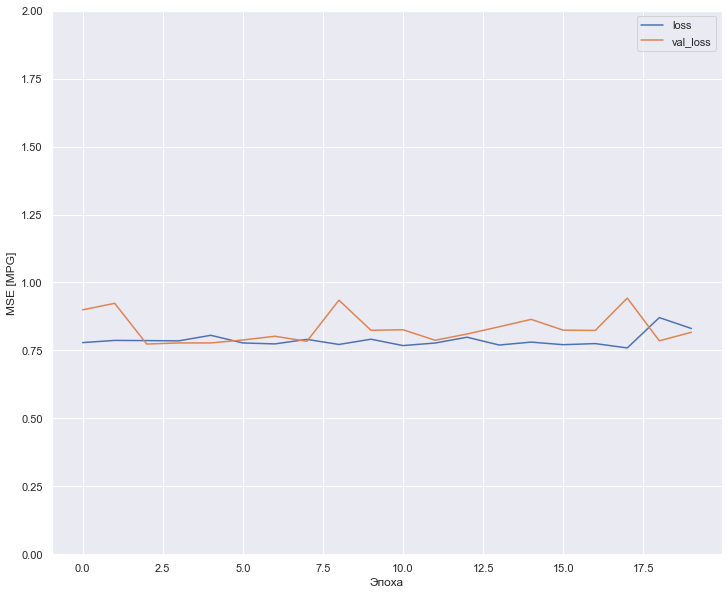

In [674]:
plot_loss(history)

In [675]:
X_test

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
386,0.0,3.930057,43.082373,2079.216323,516.439005,77.330334,24.799019,223.749031,402.943972,69.102559,1595.679674,246.810874
41,0.0,7.656211,33.571024,1913.379677,822.918735,143.576937,24.275588,274.988794,260.859341,75.957329,1639.912525,248.244330
725,90.0,7.628923,52.488265,1940.875616,813.505178,108.267128,23.655577,270.778521,799.826151,71.702195,2683.718348,138.241717
605,90.0,0.305723,73.389838,2053.292814,985.791212,59.207283,22.403912,299.670865,432.572807,74.837967,2057.493213,143.693207
35,90.0,10.000000,60.000000,2085.495837,931.310636,110.564840,23.487140,270.286765,278.230020,71.479060,2740.229631,187.861373
...,...,...,...,...,...,...,...,...,...,...,...,...
543,90.0,10.154591,63.195156,2050.006700,1137.892383,136.038193,22.500389,275.196921,1230.465214,76.570828,2584.359640,187.878352
433,0.0,10.466131,82.525493,2087.646817,4.339154,76.784021,18.552220,258.302450,68.508119,74.062349,2475.645729,237.850070
57,0.0,6.281150,72.292880,2019.065966,1081.412660,135.949276,21.497303,362.877362,34.488906,74.296701,2860.270961,186.555662
355,0.0,4.538571,63.561645,2095.716754,920.762817,105.778668,20.532135,244.476593,859.432338,72.429467,2844.655510,196.442031


In [676]:
y_test.head(10)

386    3.318032
41     4.315666
725    3.149638
605    3.858755
35     2.444177
329    2.717755
692    3.272840
618    4.545326
430    2.647706
411    2.833719
Name: Соотношение матрица-наполнитель, dtype: float64

In [677]:
len(y_test)

281

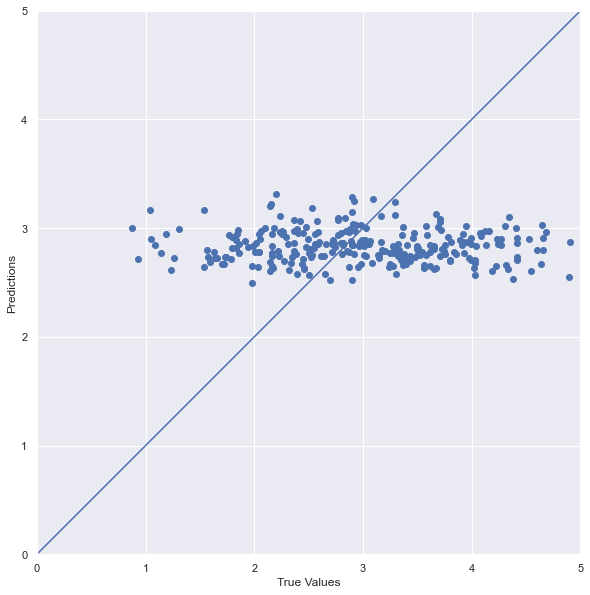

In [686]:
test_predictions = dnn_goal_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [687]:
test_predictions

array([2.85 , 2.663, 2.756, 2.763, 2.952, 2.856, 2.773, 2.604, 2.582,
       3.093, 2.755, 2.944, 2.963, 2.747, 2.611, 2.664, 2.785, 2.776,
       2.939, 2.673, 2.743, 2.97 , 3.17 , 2.638, 2.855, 2.721, 2.863,
       2.954, 2.754, 2.654, 2.887, 2.985, 2.773, 2.97 , 2.783, 2.671,
       2.669, 2.71 , 2.678, 2.937, 2.954, 2.847, 2.916, 2.903, 2.914,
       2.848, 2.761, 2.985, 2.9  , 2.666, 2.866, 2.637, 2.898, 2.975,
       2.817, 2.994, 2.868, 2.903, 3.013, 2.957, 2.944, 2.636, 2.573,
       2.837, 2.843, 2.996, 2.856, 2.914, 2.726, 2.96 , 2.839, 3.071,
       2.974, 2.847, 3.238, 2.789, 2.844, 2.646, 2.913, 2.869, 2.859,
       2.876, 3.09 , 2.973, 2.805, 3.001, 2.805, 2.864, 2.701, 2.663,
       2.792, 2.74 , 2.639, 2.669, 2.831, 2.681, 3.032, 2.607, 2.52 ,
       2.638, 2.835, 3.108, 2.64 , 2.695, 2.523, 3.012, 2.619, 2.642,
       2.497, 2.624, 2.808, 2.723, 2.763, 3.144, 2.965, 2.798, 2.788,
       2.829, 3.251, 2.876, 2.796, 2.741, 2.852, 2.627, 3.267, 2.978,
       2.566, 3.283,

In [688]:
len(test_predictions)

281

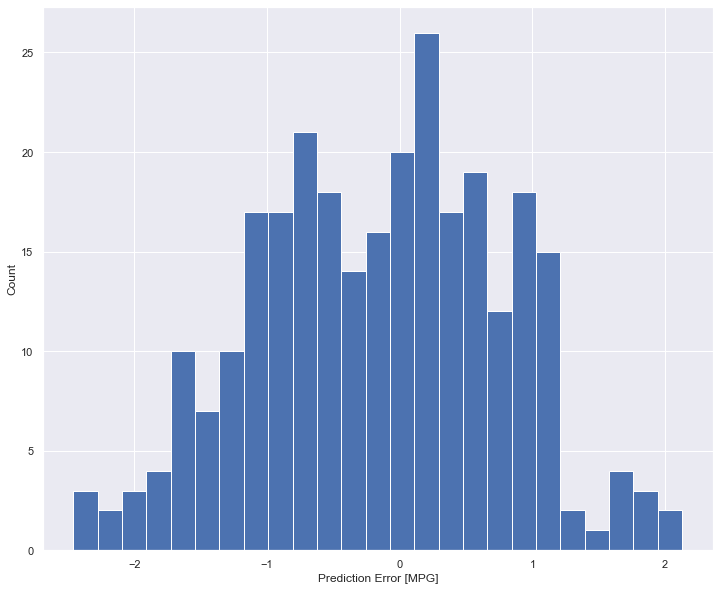

In [689]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [696]:
dnn_model.save("C:/Репозитории/repo/quallification-work/models/model_full")

INFO:tensorflow:Assets written to: C:/Репозитории/repo/quallification-work/models/model_full\assets


In [697]:
dnn_model2 = keras.models.load_model("C:/Репозитории/repo/quallification-work/models/model_full")

In [698]:
dnn_model2

In [700]:
dnn_model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_42 (Dense)            (None, 1024)              13312     
                                                                 
 dense_43 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_44 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 1,063,962
Trainable params: 1,063,937
Non-trainable params: 25
_________________________________________________________________
